In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt         #library to plot dendogram 
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch     #library for dendogram 

In [2]:
#reading the dataset
df=pd.read_csv("Datasets\\aggl.csv")
X=df.iloc[:,[3,4]].values
df

,CID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


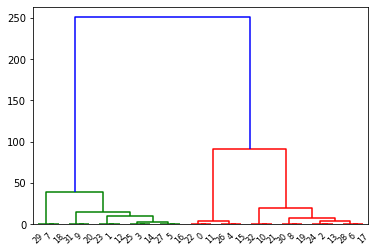

In [3]:
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))    #data just visualized not clustered actually 

In [4]:
#actually clustering the data 
model=AgglomerativeClustering(n_clusters=5,affinity='euclidean')
model.fit(X)
labels=model.labels_

In [5]:
labels  

array([2, 0, 1, 0, 2, 0, 1, 3, 1, 0, 4, 2, 0, 1, 0, 2, 0, 1, 3, 1, 0, 4,
       2, 0, 1, 0, 2, 0, 1, 3, 1, 0, 4], dtype=int64)

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt         #library to plot dendogram 
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc     #library for dendogram 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize


In [7]:
X=pd.read_csv("Datasets\\credit.csv")
X=X.drop('CUST_ID',axis=1)
X.fillna(method='ffill',inplace=True)

In [8]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_normalized=normalize(X_scaled)
X_normalized=pd.DataFrame(X_normalized)

In [9]:
pca=PCA(n_components=2)
X_principal=pca.fit_transform(X_normalized)
X_principal=pd.DataFrame(X_principal)
X_principal.columns=['P1','P2']

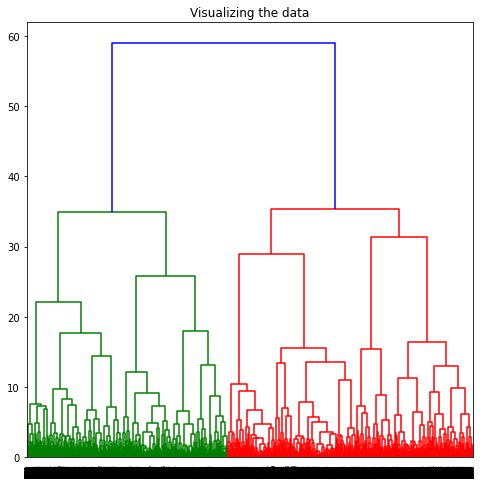

In [10]:
plt.figure(figsize=(8,8))
plt.title('Visualizing the data')
Dendrogram=shc.dendrogram((shc.linkage(X_normalized,method='ward')))

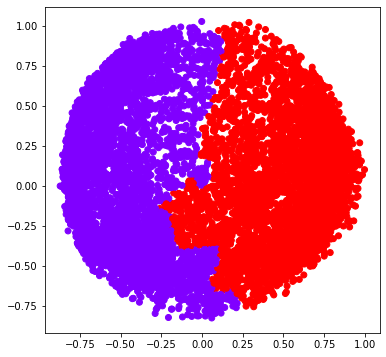

In [11]:
ac2=AgglomerativeClustering(n_clusters=2)
plt.figure(figsize=(6,6))
plt.scatter(X_principal['P1'],X_principal['P2'],
           c=ac2.fit_predict(X_principal),cmap='rainbow') #for this two column P1,P2 values we are plotting the graph 
plt.show()
